# Evaluation Classification

## Importing the libraries

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%config Completer.use_jedi = False

plt.rcParams['figure.figsize'] = [15,6]

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Importing the dataset

In [4]:
dataset = pd.read_csv("./Section 22 - Random Forest Classification/Python/Social_Network_Ads.csv")
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Random Forest Classification model on the Training set
> https://www.kaggle.com/prashant111/a-guide-on-xgboost-hyperparameters-tuning?scriptVersionId=38814952

In [8]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion="gini", random_state=0, max_depth=5)
classifier.fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier
classifierdt = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth=4)
classifierdt.fit(X_train, y_train)

from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=1000)
xgb.fit(X_train, y_train)

from lightgbm import LGBMClassifier
lgb = LGBMClassifier(n_estimators=1000)
lgb.fit(X_train, y_train)

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=1000)
gb.fit(X_train, y_train)

from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', random_state = 0)
svc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

DecisionTreeClassifier(max_depth=4, random_state=0)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

LGBMClassifier(n_estimators=1000)

GradientBoostingClassifier(n_estimators=1000)

SVC(random_state=0)

## Predicting the Test set results

In [12]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [13]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
(64+29)/(7+64+29)

# Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

# Precision
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

# F1 Score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

array([[64,  4],
       [ 3, 29]])

0.93

0.93

0.90625

0.8787878787878788

0.8923076923076922

(array([0.        , 0.05882353, 1.        ]),
 array([0.     , 0.90625, 1.     ]),
 array([2, 1, 0]))

Text(0.5, 0.98, 'ROC curve comparison')

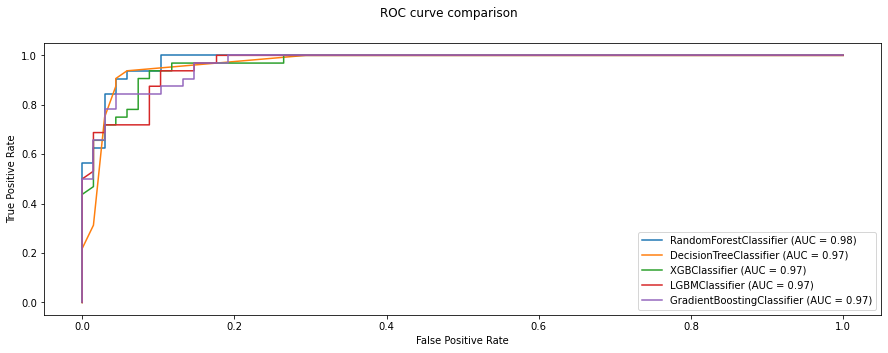

In [22]:
# ROC_AUC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
fpr, tpr, thresholds

# ROC_AUC plot
from sklearn.metrics import plot_roc_curve


rf = plot_roc_curve(classifier, X_test, y_test) 
dt = plot_roc_curve(classifierdt, X_test, y_test, ax=rf.ax_)
xgbc = plot_roc_curve(xgb, X_test, y_test, ax=dt.ax_)
lgbc = plot_roc_curve(lgb, X_test, y_test, ax=xgbc.ax_)
gbc = plot_roc_curve(gb, X_test, y_test, ax=lgbc.ax_)


xgbc.figure_.suptitle("ROC curve comparison")
plt.show()

## Cross Validation

In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, scoring='recall', cv=10, n_jobs=-1)
scores
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

array([0.85714286, 0.42857143, 0.78571429, 0.85714286, 1.        ,
       0.57142857, 0.71428571, 0.86666667, 0.86666667, 0.93333333])

Accuracy: 0.788 (0.164)


## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


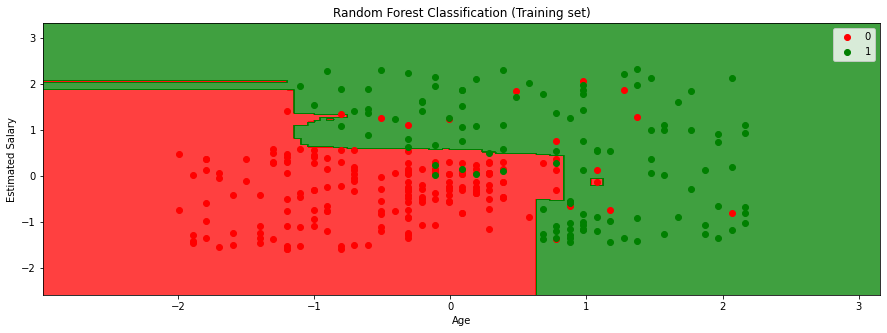

In [46]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
)
plt.contourf(
    X1,
    X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(("red", "green")),
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(("red", "green"))(i),
        label=j,
    )
plt.title("Random Forest Classification (Training set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


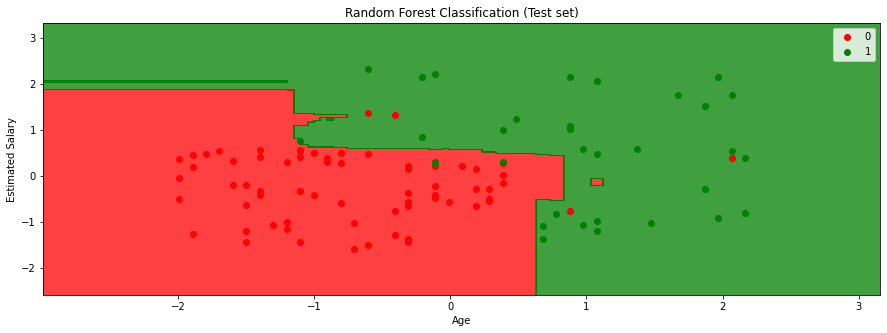

In [47]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
)
plt.contourf(
    X1,
    X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(("red", "green")),
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(("red", "green"))(i),
        label=j,
    )
plt.title("Random Forest Classification (Test set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()